In [1]:
from tensorflow import keras
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
from keras.datasets import mnist
((x_train_image, y_train_label), (x_test_image, y_test_label)) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
def polt_data(images, labels, prediction, idx, num):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title = "label=" + str(labels[idx])
    if len(prediction)>0:
      title += ",prediction=" + str(prediction[idx])
    ax.set_title(title, fontsize=10)
    ax.set_xticks([]); ax.set_yticks([])
    idx+=1
  plt.show()

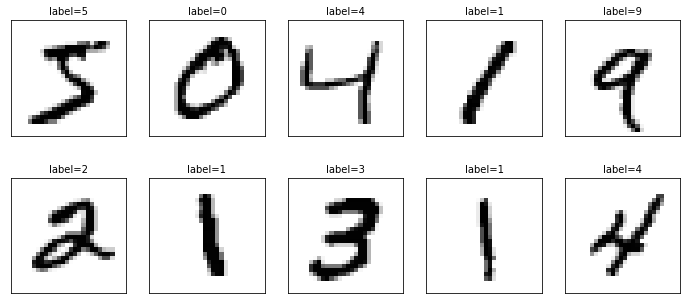

In [4]:
polt_data(x_train_image, y_train_label, [], 0, 10)

In [5]:
import random
temp = list(zip(x_train_image, y_train_label))
random.shuffle(temp)
x_train_image, y_train_label = zip(*temp)
x_train_image=np.asarray(x_train_image)
y_train_label=np.asarray(y_train_label)

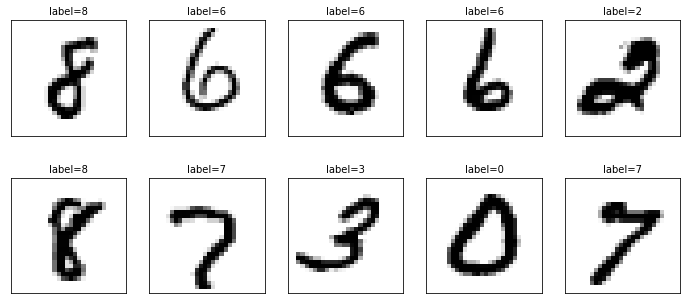

(60000, 28, 28)
(60000,)


In [6]:
polt_data(x_train_image, y_train_label, [], 0, 10)
print(x_train_image.shape)
print(y_train_label.shape)

In [7]:
x_train = x_train_image.reshape( len(x_train_image), 28*28 ).astype('float32')
x_test = x_test_image.reshape( len(x_test_image), 28*28 ).astype('float32')
x_train.shape

(60000, 784)

In [8]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

In [9]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)
y_train_onehot.shape

(60000, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
model = Sequential()
model.add( Dense( input_dim = 784, units = 1500, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add( Dense(units = 1500, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add( Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                15010     
Total params: 3,444,010
Trainable params: 3,444,010
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x = x_train_normalize, y = y_train_onehot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Epoch 1/10
240/240 - 23s - loss: 0.2931 - accuracy: 0.9109 - val_loss: 0.1237 - val_accuracy: 0.9626
Epoch 2/10
240/240 - 22s - loss: 0.1477 - accuracy: 0.9547 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 3/10
240/240 - 22s - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.0773 - val_accuracy: 0.9769
Epoch 4/10
240/240 - 22s - loss: 0.0890 - accuracy: 0.9711 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 5/10
240/240 - 22s - loss: 0.0778 - accuracy: 0.9750 - val_loss: 0.0652 - val_accuracy: 0.9822
Epoch 6/10
240/240 - 22s - loss: 0.0710 - accuracy: 0.9774 - val_loss: 0.0663 - val_accuracy: 0.9799
Epoch 7/10
240/240 - 22s - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.0663 - val_accuracy: 0.9820
Epoch 8/10
240/240 - 22s - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0610 - val_accuracy: 0.9837
Epoch 9/10
240/240 - 22s - loss: 0.0534 - accuracy: 0.9827 - val_loss: 0.0723 - val_accuracy: 0.9812
Epoch 10/10
240/240 - 22s - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0710 - val_accura

In [15]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print(scores[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0714 - accuracy: 0.9802
0.9801999926567078


In [16]:
prediction_class = model.predict_classes( x_test_normalize )
print( prediction_class[340:350] )
print( y_test_label[340:350] )
prediction_proba = model.predict_proba( x_test_normalize )
print( prediction_proba[340:350] )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[5 6 1 3 8 1 0 5 1 3]
[5 6 1 3 8 1 0 5 1 3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[3.43332438e-08 1.17040426e-03 2.08547726e-06 3.78331572e-01
  6.27927761e-07 6.20455444e-01 3.18987190e-06 1.74065860e-07
  2.24567939e-05 1.40225266e-05]
 [5.41028939e-03 8.16708838e-04 1.49400308e-04 4.43508936e-04
  2.29848102e-02 1.85923241e-02 9.02221560e-01 3.26628541e-03
  4.39910479e-02 2.12403969e-03]
 [2.70256853e-13 9.99999881e-01 2.86854512e-10 4.08693955e-12
  1.04416786e-08 6.11247869e-13 9.35380896e-13 7.37847685e-08
  6.68045619e-09 5.86697524e-10]
 [1.94311928e-11 6.26102103e-09 6.74941063e-08 9.99997258e-01
  1.04286970e-11 2.54622591e-06 2.94146923e-13 2.03787626e-10
  8.27537292e-08 7.74229747e-08]
 [1.62106642e-06 7.24636664e-07 1.19286233e-06 3.70039379e-05
  2.91751326e-06 1.96241308e-04 1.73397748e-05 9.68644098e-09
  9.99735534e-01 7.40194491e-06]
 [1.31077484e-11 9.99997854e-01 1.93030791e-09 6.22214058e-10
  5.85314581e-07 1.24652033e-11 3.11981864e-12 1.45087972e-06
  3.85331482e-08 1.39613391e-07]
 [9.99999881e-01 6.98324298e-12 1.00160932e-07 3.02855518e

In [17]:
import pandas as pd
pd.crosstab(y_test_label, prediction_class, colnames=['predict'], rownames=['real'])

predict,0,1,2,3,4,5,6,7,8,9
real,,,,,,,,,,
0,971,0,2,1,1,0,2,1,1,1
1,0,1131,1,0,0,0,1,0,2,0
2,2,4,1011,1,1,0,0,10,3,0
3,0,0,2,988,0,5,0,6,1,8
4,1,0,3,0,959,0,3,2,0,14
5,3,0,1,5,1,873,2,2,2,3
6,3,3,0,0,5,4,941,0,2,0
7,0,3,5,1,0,0,0,1014,0,5
8,6,0,2,14,6,8,0,5,927,6


In [18]:
model.save('handwrite.h5')

In [19]:
test_model = keras.models.load_model('handwrite.h5')

In [20]:
scores = test_model.evaluate(x_test_normalize, y_test_onehot)
print(scores[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0714 - accuracy: 0.9802
0.9801999926567078


In [47]:
test_vec = np.random.rand(784).reshape(-1,784)
test_vec.shape

(1, 784)

In [48]:
testing_prob = test_model.predict_proba(test_vec)
print(testing_prob)
testing_class = test_model.predict_classes(test_vec)
print(testing_class)

[[3.0653831e-04 5.0634588e-03 3.6935520e-01 6.0292572e-01 3.4571109e-05
  6.9741816e-03 1.4777337e-04 1.0756506e-02 3.5410081e-03 8.9510565e-04]]
[3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
